In [16]:
# 데이터 구성: Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 평가 함수
from statsmodels.tools.eval_measures import rmse
# jupyter notebook ㅇ사용시 그래프 자동 출력 옵션
%matplotlib inline

# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

### step 1 데이터 구성하기

In [5]:
# 파일명, 변수, 값 등에 한글 포함시 engine = "python"으로 지정
df_raw = pd.read_csv("/home/pirl/test/BigData/DIABETES.csv", encoding='euc-kr')
df_raw.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [7]:
print("Diabetes data set dimensions : {}".format(df_raw.shape))

Diabetes data set dimensions : (442, 11)


### step 2 변수 간의 경향성 파악 - 그래프 분석

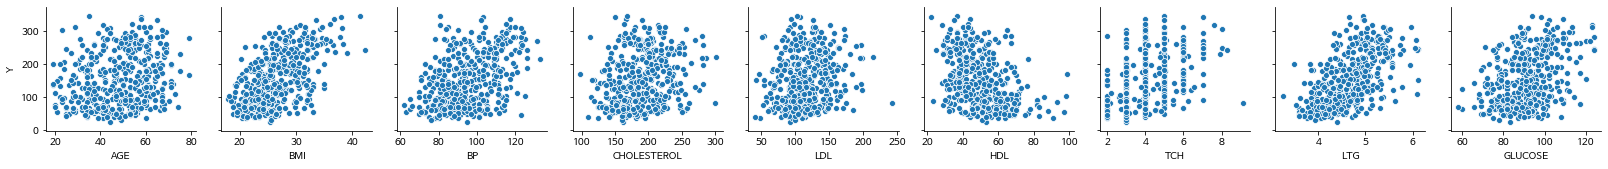

In [8]:
# 산점도 행렬: 목표변수와 설명변수 지정, kind = "scatter"|"reg"
sns.pairplot(df_raw, y_vars="Y", x_vars=["AGE", "BMI", "BP", "CHOLESTEROL","LDL", "HDL",
                                         "TCH", "LTG", "GLUCOSE"])

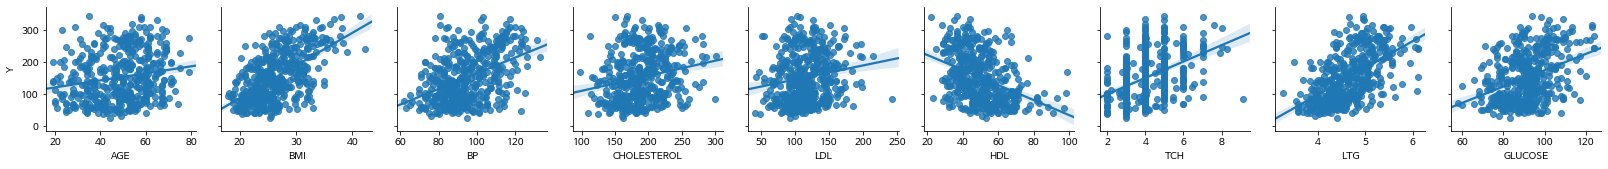

In [10]:
# 회귀 적합선 추가: kind = "reg"
sns.pairplot(df_raw, y_vars="Y", x_vars=["AGE", "BMI", "BP", "CHOLESTEROL","LDL", "HDL",
                                         "TCH", "LTG", "GLUCOSE"], kind="reg")

### step 2 변수 간의 경향성 파악

### 그래프 분석

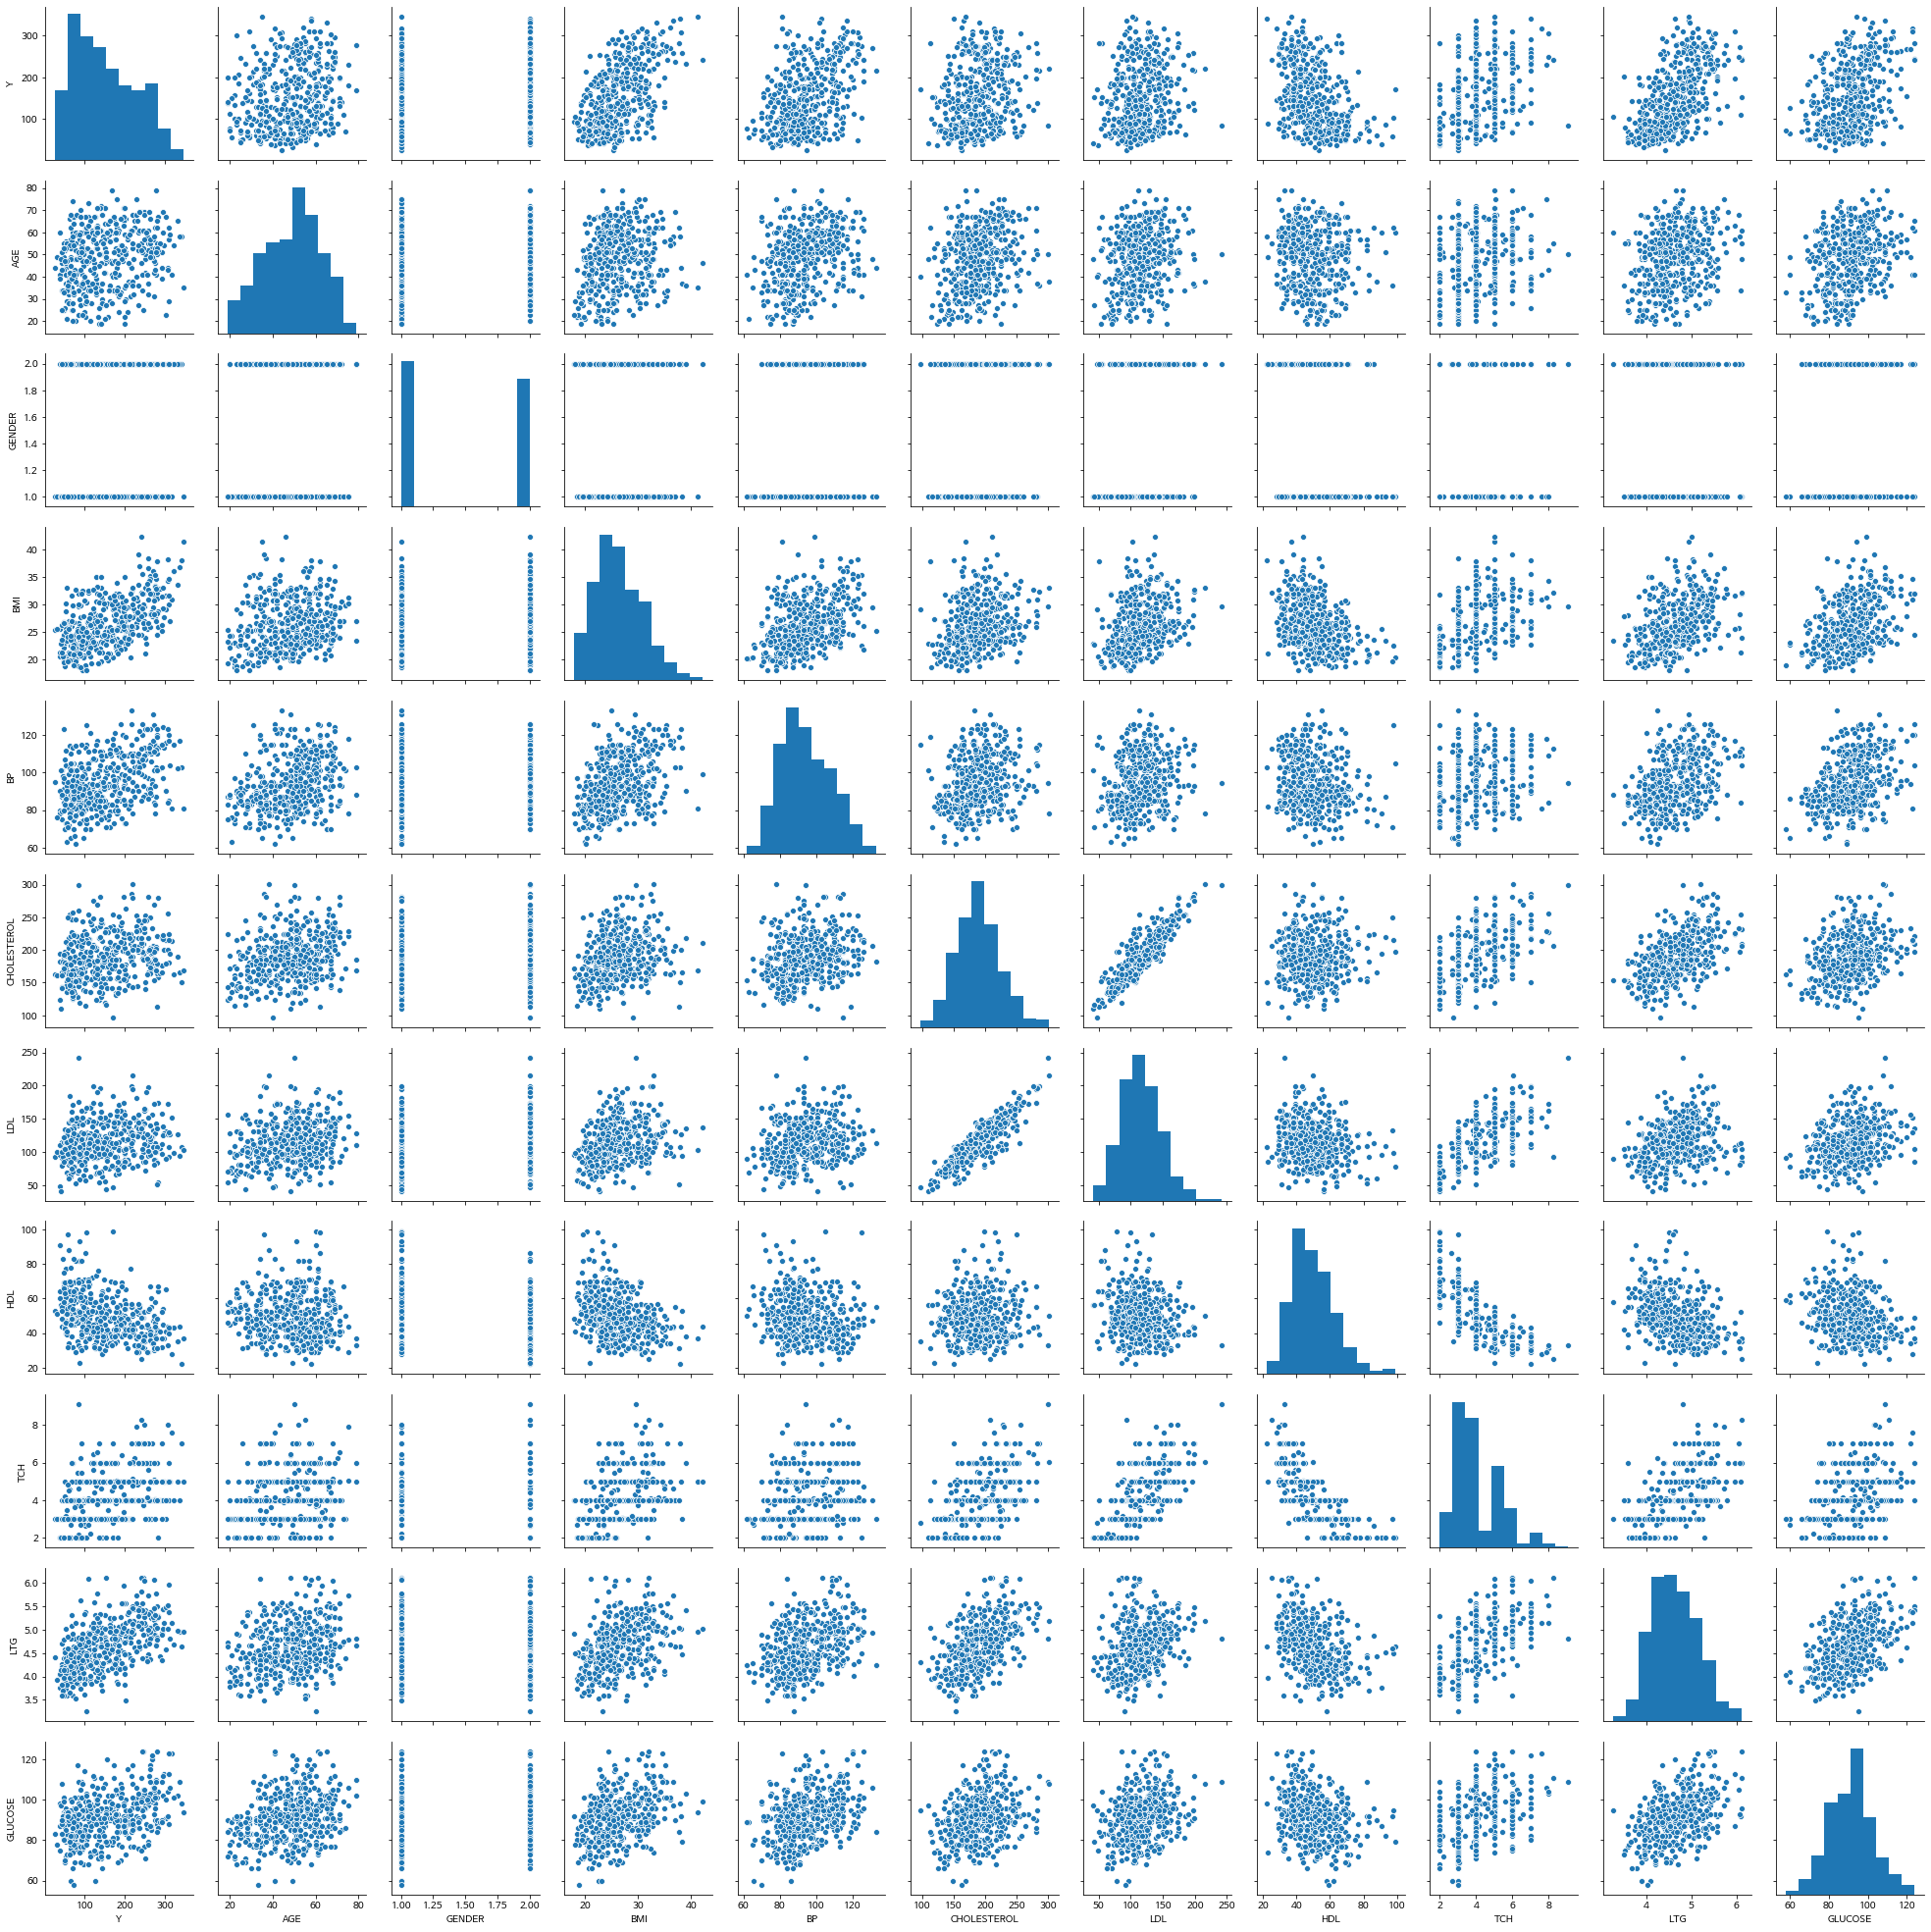

In [11]:
# 산점도 행렬:전체 숫자형 변수
sns.pairplot(df_raw)

### 상관관계 분석

In [12]:
# 상관관계 분석
df_raw.corr().round(3)

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
Y,1.000,0.188,0.043,0.586,0.441,0.212,0.174,-0.395,0.430,0.566,0.382
AGE,0.188,1.000,0.174,0.185,0.335,0.260,0.219,-0.075,0.204,0.271,0.302
GENDER,0.043,0.174,1.000,0.088,0.241,0.035,0.143,-0.379,0.332,0.150,0.208
BMI,0.586,0.185,0.088,1.000,0.395,0.250,0.261,-0.367,0.414,0.446,0.389
BP,0.441,0.335,0.241,0.395,1.000,0.242,0.186,-0.179,0.258,0.393,0.390
CHOLESTEROL,0.212,0.260,0.035,0.250,0.242,1.000,0.897,0.052,0.542,0.516,0.326
LDL,0.174,0.219,0.143,0.261,0.186,0.897,1.000,-0.196,0.660,0.318,0.291
HDL,-0.395,-0.075,-0.379,-0.367,-0.179,0.052,-0.196,1.000,-0.738,-0.399,-0.274
TCH,0.430,0.204,0.332,0.414,0.258,0.542,0.660,-0.738,1.000,0.618,0.417
LTG,0.566,0.271,0.150,0.446,0.393,0.516,0.318,-0.399,0.618,1.000,0.465


/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


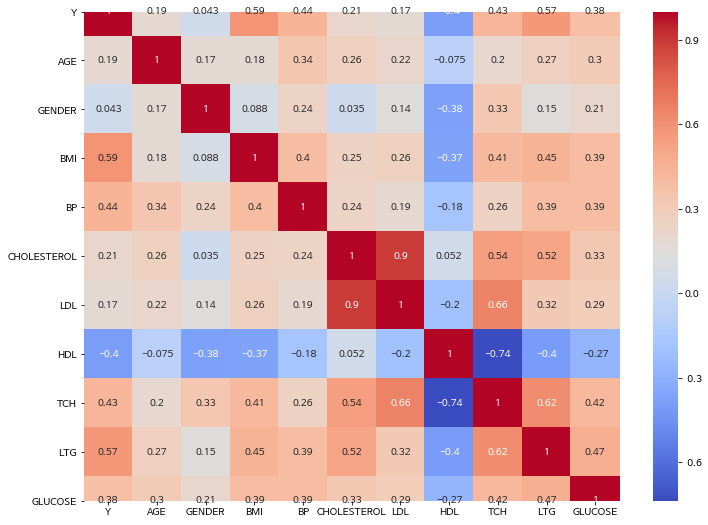

In [14]:
plt.figure(figsize = (12,9))
sns.heatmap(df_raw.corr(method = "pearson").round(3), annot = True, cmap = 'coolwarm')
plt.show()

### step 3 회귀 모델 생성

### 설명변수 전체

In [42]:
# 선형 회귀 분석: formula(y ~ X1 + X2 + ...) 이용. 상수항(intercept) 자동 추가. 코드 중간에 줄 바꿈 "\" 추가
reg_model = smf.ols(formula= "Y ~ AGE + GENDER + BMI + BP + CHOLESTEROL + LDL + HDL \
                             + TCH + LTG + GLUCOSE", data = df_raw)
# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           3.83e-62
Time:                        17:01:35   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -334.5671     67.455     -4.960      

### 설명변수 간의 다중공선성 확인

In [18]:
# 설명변수 간의 다중공선성 확인: 설명변수 데이터 생성 및 상수항 추가
df_raw_x = df_raw.drop("Y", axis = 1)
# statsmodels의 상수항 추가 함수 적용
df_raw_x_const = add_constant(df_raw_x)
# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_raw_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_x_const.values, i) for i in range(df_raw_x_const.shape[1])]
# VIF 정렬
df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
1,AGE,1.217
2,GENDER,1.278
4,BP,1.459
10,GLUCOSE,1.485
3,BMI,1.509
8,TCH,8.891
9,LTG,10.076
7,HDL,15.402
6,LDL,39.193
5,CHOLESTEROL,59.203


### 설명변수 다중공선성 처리

In [19]:
# 선형 회귀 분석: formula(y ~ X1 + X2 + ...) 이용. 상수항(intercept) 자동 추가. 코드 중간에 줄 바꿈 "\" 추가
# HDL, LDL, CHOLESTEROL 제외
reg_model = smf.ols(formula= "Y ~ AGE + BMI + BP + TCH + LTG + GLUCOSE", data = df_raw)
# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     67.64
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           3.16e-59
Time:                        16:16:42   Log-Likelihood:                -2401.5
No. Observations:                 442   AIC:                             4817.
Df Residuals:                     435   BIC:                             4846.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -330.7224     29.305    -11.285      0.0

### 설명변수 다중공선성 처리

In [20]:
# 다중공선성 높은 변수 제거 후 공선성 재확인
df_raw_x = df_raw.drop(["Y","HDL","LDL","CHOLESTEROL" ],axis = 1)
# statsmodels의 상수항 추가 함수 적용
df_raw_x_const = add_constant(df_raw_x)

# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_raw_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_x_const.values, i) for i in range(df_raw_x_const.shape[1])]
# VIF 정렬
df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)

,variable,VIF
1,AGE,1.191
2,GENDER,1.204
3,BMI,1.445
4,BP,1.453
7,GLUCOSE,1.480
5,TCH,1.912
6,LTG,1.962
0,const,125.338


### step 4 후진제거법을 이용한 변수 선택

In [21]:
# RFE(recursive feature elimination)함수: 입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적으로 제거
# 목표 변수 분리
df_raw_y = df_raw["Y"]
# sklearn의 선형회귀 모델
model = LinearRegression()
# 전체 변수 중 5개의 변수가 남을 때까지 변수 선택
rfe = RFE(estimator= model, n_features_to_select= 5).fit(df_raw_x, df_raw_y)
# 선택된 변수
selected_cols = df_raw_x.columns[rfe.support_] # rfe.support_는 True / False로 구성
# 제거된 편수
removed_cols = df_raw_x.columns[~rfe.support_]

print("Selected Variables: {}".format(selected_cols))
print("Removed Variables: {}".format(removed_cols))


Selected Variables: Index(['GENDER', 'BMI', 'BP', 'TCH', 'LTG'], dtype='object')
Removed Variables: Index(['AGE', 'GLUCOSE'], dtype='object')


### 후진제거법을 이용한 변수 선택 및 모델 생성

In [26]:
# 회귀 모델 생성
rfe_reg_model = smf.ols(formula = "Y ~ GENDER + BMI + BP + TCH + LTG", data = df_raw)
# 적합
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     84.11
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           9.85e-62
Time:                        16:22:19   Log-Likelihood:                -2397.9
No. Observations:                 442   AIC:                             4808.
Df Residuals:                     436   BIC:                             4832.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -309.3713     27.749    -11.149      0.0

### 후진제거법을 이용한 변수 선택 - 선택된 설명변수의 다중공선성 재진단

In [27]:
# 후진제거법에 의하여 선택된 데이터
df_raw_x_rfe = df_raw_x[selected_cols]
df_raw_x_rfe_const = add_constant(df_raw_x_rfe)
# 다중공선성 저장
df_rfe_vif = pd.DataFrame()
df_rfe_vif["variable"] = df_raw_x_rfe_const.columns
df_rfe_vif["VIF"] = [variance_inflation_factor(df_raw_x_rfe_const.values, i) for i in range(df_raw_x_rfe_const.shape[1])]
df_rfe_vif.sort_values("VIF", inplace = True)
df_rfe_vif.round(3)

,variable,VIF
1,GENDER,1.191
3,BP,1.342
2,BMI,1.414
5,LTG,1.875
4,TCH,1.881
0,const,111.223


In [32]:
df_raw.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


### GENDER별 나누어서 분석

In [36]:
df_raw_G1 = df_raw[df_raw["GENDER"] == 1]
df_raw_G2 = df_raw[df_raw["GENDER"] == 2]

In [38]:
# 회귀 모델 생성
rfe_reg_model = smf.ols(formula = "Y ~ GENDER + BMI + BP + TCH + LTG", data = df_raw)
# 적합
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     84.11
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           9.85e-62
Time:                        16:56:01   Log-Likelihood:                -2397.9
No. Observations:                 442   AIC:                             4808.
Df Residuals:                     436   BIC:                             4832.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -309.3713     27.749    -11.149      0.0

In [39]:
# G1
# 회귀 모델 생성
rfe_reg_model = smf.ols(formula = "Y ~ GENDER + BMI + BP + TCH + LTG", data = df_raw_G1)
# 적합
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     44.81
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           8.52e-28
Time:                        16:56:03   Log-Likelihood:                -1282.7
No. Observations:                 235   AIC:                             2575.
Df Residuals:                     230   BIC:                             2593.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -134.6597     19.419     -6.934      0.0

In [40]:
# G2
# 회귀 모델 생성
rfe_reg_model = smf.ols(formula = "Y ~ GENDER + BMI + BP + TCH + LTG", data = df_raw_G2)
# 적합
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     66.84
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           6.08e-36
Time:                        16:56:04   Log-Likelihood:                -1109.0
No. Observations:                 207   AIC:                             2228.
Df Residuals:                     202   BIC:                             2245.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -81.6348      7.654    -10.666      0.0

### 결론 도출

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


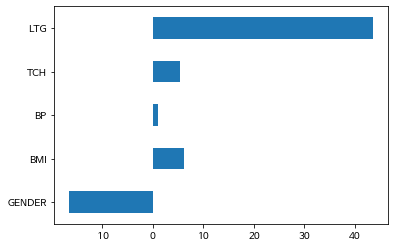

In [28]:
# 설명변수 중요도(표준화 적용 이전) -> 표준화 회귀계수 산출해야 함
df_reg_coef = pd.DataFrame({"Coef": rfe_reg_result.params.values[1:]}, index = selected_cols)
df_reg_coef.plot.barh(y = "Coef", legend = False)

In [30]:
# 설명변수 표준화 적용 -> 표준화 회귀계수 산출 목적
scaler = StandardScaler()
# Scale 변환대상 변수 : 일반적으로 설명변수
cols = df_raw_x.columns
# Scale 변환
np_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(np_scaled, columns = cols)
# 목표변수 추가
df_scaled["Y"] = df_raw["Y"]
reg_model_scaled = smf.ols(formula = "Y ~ GENDER + BMI + BP + TCH + LTG", data = df_scaled)
reg_result_scaled = reg_model_scaled.fit()
print(reg_result_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     84.11
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           9.85e-62
Time:                        16:22:47   Log-Likelihood:                -2397.9
No. Observations:                 442   AIC:                             4808.
Df Residuals:                     436   BIC:                             4832.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.631     57.821      0.0